# Project 3 - Part 2

<b>Yes, this is a group assignment. You may have up to five group members.</b>

In [1]:
name_l = ["Leonid Rempel", "Angela Zhang", "Zach Christopher", "Alex Xu"]     # Please add group names to this list; delete "Member 2" if group of one
name_s = name_l[0] + ", "
if len(name_l) > 1:
    for name in name_l[1:]:
        name_s = name_s + name + ", "

print("Project 2 Part 1 submission for {}.".format(name_s[0:-2]))

Project 2 Part 1 submission for Leonid Rempel, Angela Zhang, Zach Christopher, Alex Xu.


Please rename the file so that it includes the BC username of whomever submits it. I would submit <b>MFIN2270_F19_Project3_Part2-reuterj</b>.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
def reg_m(y, x):
    X = np.hstack((np.ones((len(x),1)), x))     # adds column of ones to X
    results = sm.OLS(y, X).fit()                # creates object containing regression results
    return results

In [4]:
# Formats how numbers are displayed by numpy
def float_formatter(x):
    return "{:7.4f}".format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})

<b>(3 points) Question 1. More Experience Estimating CAPM Alphas and Betas</b> 

- <b>Step 1.</b> Load all of the daily stock return data for your group members and the daily factor returns data created in Project3_daily.ipynb. This will involving using np.load() to separately load each array of daily returns that were created and submitted for Project 3 Part 1, as well as Project3_ret.npy, etc.
- <b>Step 2.</b> Estimate a single CAPM alpha and CAPM beta for each of your stocks, using all nonmissing daily returns between 20151001 and 20190930 and the corresponding nonmissing 'MKTRF' returns from Project3_ret.npy. If your group consists of four members and one stock pick overlaps for two group members, you will estimate seven unique alphas and betas. If you solve Project 3 Part 2 on your own, you will estimate two unique alphas and betas.
- <b>Step 3.</b> Create a table using print statements that contains five columns. Column one contains the ticker of each stock, column two contains the alpha, column three contains the p-value for alpha (from <b>reg_m()</b>), column four contains the beta, and column five contains the p-value for beta (from <b>reg_m()</b>). 

<i>Hint: This question should remind you very much of a question from HW11.</i>

In [5]:
ff_rets = np.load('Project3_ret.npy')
ff_cols = np.load('Project3_ret_cols.npy')
ff_date = np.load('Project3_ret_rows.npy')
rf    = ff_rets[:,ff_cols=='RF']
mktrf = ff_rets[:,ff_cols=='MKTRF']

In [6]:
amzn = np.load('amzn_daily.npy')
costco = np.load('cost.npy')
ea = np.load('ea.npy')
ibm = np.load('ibm.npy')
google = np.load('goog_daily.npy')
ulta = np.load('ulta_daily.npy')
wayfair = np.load('wayfair.npy')

l = [amzn,costco,ea,ibm,google,ulta,wayfair]

dates_am = np.load('amzn_dates.npy')
dates_c = np.load('dates_cost.npy')
dates_e = np.load('dates_ea.npy')
dates_i = np.load('ibm_date.npy')
dates_g = np.load('goog_dates.npy')
dates_u = np.load('ulta_dates.npy')
dates_w = np.load('wayfair_date.npy')

if np.array_equal(dates_am, ff_date) & np.array_equal(dates_c,ff_date) & np.array_equal(dates_e, ff_date) & np.array_equal(dates_i,ff_date) & np.array_equal(dates_g,ff_date) & np.array_equal(dates_u,ff_date) & np.array_equal(dates_w,ff_date):
    print('Dates are all the same')

Dates are all the same


In [7]:
amzn_rf = (amzn - rf[0]).reshape(1006,1)
costco_rf = (costco - rf[0]).reshape(1006,1)
ea_rf = (ea-rf[0]).reshape(1006,1)
ibm_rf = (ibm-rf[0]).reshape(1006,1)
google_rf = (google - rf[0]).reshape(1006,1)
ulta_rf = (ulta - rf[0]).reshape(1006,1)
wayfair_rf = (wayfair-rf[0]).reshape(1006,1)

capms = [('AMZN',amzn_rf), ('COST',costco_rf), ('EA',ea_rf), ('IBM',ibm_rf), ('GOOG',google_rf), ('ULTA',ulta_rf), ('W',wayfair_rf)]

end = []
for element in capms:
    reg_out = reg_m(element[1],mktrf)
    a = reg_out.params[0]
    b = reg_out.params[1]
    ap = reg_out.pvalues[0]
    bp = reg_out.pvalues[1]
    end.append((element[0],[a,ap,b,bp]))

In [8]:
print('\t Ticker   Alpha   P-Value_Alpha   Beta     P-Value_Beta')
for x in end:
    print('\t  {} \t{}\t    {}     {}     {}'.format(x[0],float_formatter(x[1][0]),float_formatter(x[1][1]),float_formatter(x[1][2]),float_formatter(x[1][3])))


	 Ticker   Alpha   P-Value_Alpha   Beta     P-Value_Beta
	  AMZN 	 0.0007	     0.1082      1.3464      0.0000
	  COST 	 0.0008	     0.0298     -0.0129      0.7730
	  EA 	 0.0007	     0.2807     -0.2369      0.0013
	  IBM 	 0.0003	     0.5220     -0.0111      0.8172
	  GOOG 	 0.0002	     0.5273      1.1746      0.0000
	  ULTA 	 0.0002	     0.7412      0.9190      0.0000
	  W 	 0.0017	     0.1270      0.0146      0.9085


<b>(4 points) Question 2. Towards a Deeper Understanding of Confidence Intervals</b> 

- Assume that the monthly excess returns for hypothetical company GOAT are equal to 0.25% plus 0.85 times the monthly excess return on the market plus an idiosyncratic return component: 

$\hspace{1in} r^{GOAT}_{t} - r^{rf}_{t} = 0.0025 + (0.85)\left(^{MKT}_{t} - r^{rf}_{t}\right) + \epsilon_t$.

- Assume that the monthly excess return on the market is normally distributed with a mean of 1.0% and a standard deviation of 0.5%. Assume that the monthly idiosyncratic return component is normally distributed with a mean of 0.0% and a standard deviation of 0.5%.
- <b>Step 1.</b> Simulate 120 monthly excess returns on the market (${MKT}_{t} - r^{rf}_{t}$) and 120 monthly idiosyncratic returns ($\epsilon_t$). Use these two sets of simulated returns and the parameters above to calculate 120 monthly excess returns for GOAT. Use the simulated data to estimate the CAPM beta and the 90% confidence intervals (alpha = 0.10) for the CAPM beta (the true value of which is 0.85). Create a variable that equals one when the 90% confidence interval includes 0.85 and 0 otherwise.
- <b>Step 2.</b> Repeat this exercise 10000 times. Print a sentence that reports the fraction of the 10,000 estimated 90% confidence intervals that include 0.85.

In [9]:
results = []
for i in range(10000):
    monthly_excess_ret = np.full((1, 120), 0.0025)
    goat_beta = 0.85
    
    mrkt_excess_ret = np.random.normal(0.01, 0.005, 120)
    ei_ret = np.random.normal(0, 0.05, 120)

    monthly_excess_ret = monthly_excess_ret + goat_beta*mrkt_excess_ret + ei_ret

    reg_out = reg_m(np.reshape(monthly_excess_ret,(120,1)), np.reshape(mrkt_excess_ret, (120,1)))

    lower_c = reg_out.conf_int(alpha=0.1)[1,0]
    upper_c = reg_out.conf_int(alpha=0.1)[1,1]

    if goat_beta <= upper_c and goat_beta >= lower_c:
        results.append(1)
    else: 
        results.append(0)

print('The fraction of times that the estimated 90% CI include 0.85 out of 10000 simulations is: {}'.format(sum(results)/len(results)))


The fraction of times that the estimated 90% CI include 0.85 out of 10000 simulations is: 0.9009


<b>(8 points) Question 3. Plotting (Risk, Return) Combinations and Calculating Sharpe Ratios</b>

- Choose one and only one of the stocks from question 1. I will refer to this stock as 'STOCK'. It will work best if this stock does not have any missing return data between 20151001 and 20190930.
- <b>Step 1.</b> Use daily return data for the two-year period 20151001 through 20170930 to calculate (i) the average daily return on 'STOCK' (before subtracting off the risk-free rate), (ii) the average daily return on 'RF', and (iii) the covariance matrix based on daily returns for 'STOCK' and 'RF'. Assume that these estimated means, variances, and covariances correspond to the expected daily returns, variances, and covariance for these two assets.
- <b>Step 2.</b> Use the estimated means, variances, and covariances to calculate the expected return and standard deviation of 101 portfolios (numbered 0 to 100). Portfolio 0 allocates 100% to 'STOCK' and 0% to 'RF', Portfolio 1 allocates 99% to 'STOCK' and 1% to 'RF', ..., Portfolio 50 allocates 50% to 'STOCK' and 50% to 'RF', ..., Portfolio 99 allocates 1% to 'STOCK' and 99% to 'RF', and Portfolio 100 allocates 0% to 'STOCK' and 100% to 'RF'. Store the expected returns an array named 'er' and the standard deviations in an array named 'sd'. My advice is to 
- Recall that the expected return of a portfolio that invests $w_a$ in asset $a$ and $1-w_a$ in asset $b$ is equal to: 

$\hspace{1in} w_a E[r_a] + (1-w_a) E[r_b]$

- and the variance of a portfolio that invests $w_a$ in asset $a$ and $1-w_a$ in asset $b$ is equal to: 

$\hspace{1in} w_a^2 \ Var(a) + (1 - w_a)^2 \ Var(b) + 2 \ w_a \ (1 - w_a) \ Cov(a,b)$.

- <b>Step 3.</b> Plot the 101 expected returns (y-axis) and standard deviations (x-axis). Your plot should include a descriptive title.
- <b>Step 4.</b> Define each portfolio's Sharpe Ratio (SR) as the average daily return (between 20151001 and 20170930) minus the average daily risk-free rate between (20151001 and 20170930), divided by the standard deviation of the daily portfolio return (between 20151001 and 20170930). Create an array 'sr' containing the SRs of each of your 101 portfolios. These SRs can be calculated directly from the statistics that you have already calculated. 
- <b>Step 5.</b> Determine, and use a print statement to report, which of the 101 portfolios has the highest SR. 

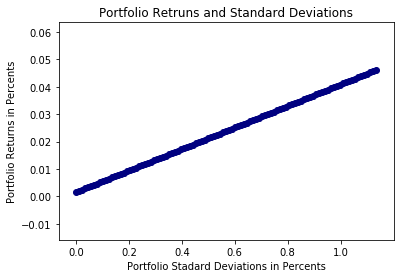

The highest sharpe ratio among the portfolios is 0.0394 which is given by the portfoltio where the weight
on the stock is 1.0


In [10]:
rf = ff_rets[:,ff_cols =='RF'].reshape(1,1006)
c = costco.tolist()
r = rf[0].tolist()
d = dates_c.tolist()

#print(d[int(len(d)/2)])

# 20170930 is roughly half of the data, int(len(dates))/2 + 1

halfway = int(len(d)/2)+1

#print(dates_c[halfway]) - which returns october 2nd

# 20170930 is a saturday, there are no returns for that day

nc = []
nrf = []
nd = []

for i in range(0,halfway,1):
    nc.append(c[i])
    nrf.append(r[i])
    nd.append(d[i])
    
#print(nd[-1])

costco = np.array(nc)
rf = np.array(nrf)
    
stock = costco
avg_s = np.mean(costco)
var_s = np.var(costco)

avg_rf = np.mean(rf)
var_rf = np.var(rf)

cov_p = np.cov(stock, rf)[0,1]

# print(avg_s)
# print(avg_rf)
# print(var_s)
# print(var_rf)
# print(cov_p)

w = [element/100 for element in range(0,101,1)]
a = [w[-i] for i in range(1,102,1)]

w_stock = np.array(w)
w_rf = np.array(a)

er = w_stock*avg_s + w_rf*avg_rf
port_vars = (w_stock**2)*var_s + (w_rf**2)*var_rf + 2*w_stock*w_rf*cov_p
sd = port_vars**0.5


plt.scatter(sd*100, er*100, color='navy')
plt.xlabel('Portfolio Stadard Deviations in Percents')
plt.ylabel('Portfolio Returns in Percents')
plt.title('Portfolio Retruns and Standard Deviations')
plt.show()

sr = (er-avg_rf)/sd

print('The highest sharpe ratio among the portfolios is{} which is given by the portfoltio where the weight\non the stock is {}'.format(float_formatter(np.amax(sr)),w[np.argmax(sr)]))


<b>(1 point) Bonus Question.</b> Assume that you decide to invest $1 million in the portfolio in question 3 that had the highest SR as of 20170930. What is the actual two-year return of this portfolio between 20170930 and 20190930 (under the assumption that you do not rebalance your portfolio)?

In [11]:
#The Portfolio with the highest SR is where I invest all the $1 million into good ol' costco, which has an alpha value that is significant at the 5% level

n_costco = np.load('cost.npy')

n_dates_c = np.load('dates_cost.npy')

c1 = n_costco.tolist()
d1 = n_dates_c.tolist()

nnc = []
nnd = []

h = int(len(d1)/2) + 1

while h < len(d):
    nnc.append(c1[h])
    nnd.append(d1[h])
    h=h+1
 
#print(nnd[0])
#print(nnd[-1])
    
stock = np.array(nnc)

stock = stock+1
ret = 1000000*np.sum(stock)-1000000

print('The actual two year return on the 100% Costco weighted portfolio is {}'.format(float_formatter(ret)))


The actual two year return on the 100% Costco weighted portfolio is 501600656.5630
